In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pickle

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.lines as mlines
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm

In [4]:
import crflux.models as pm
import mceq_underground_helpers as mh

In [5]:
plot_dir = '/hetghome/khymon/Plots/cs-analysis/'

In [29]:
# plot settings - indicate which cs change

pi_mod = "15" # factor just as numbers
nucleus = "_fe" # _fe for ron, "" for proton

#keep the following unchanged
yields_jan_mod = "yields_jan_p" + pi_mod + nucleus
yields_apr_mod = "yields_apr_p" + pi_mod + nucleus
yields_jul_mod = "yields_jul_p" + pi_mod+ nucleus

jan_mod = "jan_p" + pi_mod+ nucleus
jul_mod = "jul_p" + pi_mod+ nucleus

if pi_mod == "15":
    cs = '1.5'
elif pi_mod == "05":
    cs = '0.5'

# make unmodified label including option to add iron

yields_jan = "yields_jan" + nucleus
yields_apr = "yields_apr" + nucleus
yields_jul = "yields_jul" + nucleus

jan = "jan" + nucleus
jul = "jul" + nucleus



In [7]:
cnorm = Normalize(min(mh.slant_depths-1), max(mh.slant_depths))
s_m = cm.ScalarMappable(cmap=cm.magma_r, norm=cnorm)
s_m.set_array([])

<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/565401358.py:35: SyntaxWarning: invalid escape sequence '\s'
  plt.title(cs+'x$\sigma_{\pi -\mathrm{air}}$ April atm.')


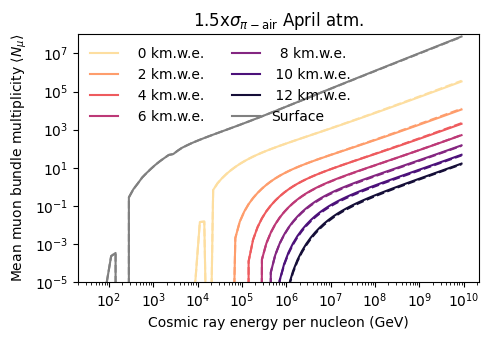

In [10]:
plt.figure(figsize=(5.0, 3.5))
angle = 0.0
for ia, X in enumerate(mh.slant_depths[:-1:4]):
    l = plt.loglog(
        mh.cr_grid,
        [mh.mean_mult(X, angle, yields_apr, ei) for ei, e_cr in enumerate(mh.cr_grid)],
        c=s_m.to_rgba(X),
        label=r"{0:3.0f} km.w.e.".format(X),
    )[0]
plt.loglog(
    mh.cr_grid,
    [mh.mean_mult(0., angle, yields_apr, ei) for ei, e_cr in enumerate(mh.cr_grid)],
    color="gray",
    label=r"Surface".format(X),
)[0]

for ia, X in enumerate(mh.slant_depths[:-1:4]):
    l = plt.loglog(
        mh.cr_grid,
        [mh.mean_mult(X, angle, yields_apr_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)],
        c=s_m.to_rgba(X),ls='--'
    )[0]
plt.loglog(
    mh.cr_grid,
    [mh.mean_mult(0., angle, yields_apr_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)],
    color="gray", ls='--'
)[0]

plt.ylim(1e-5, 1e8)
if nucleus =='_fe':
    plt.xlim(20.0,)
else:
 plt.xlim(20.0, 1e7)
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.title(cs+'x$\sigma_{\pi -\mathrm{air}}$ April atm.')
plt.ylabel(r"Mean muon bundle multiplicity $\langle N_\mu \rangle$")
plt.legend(frameon=False, ncol=2)
plt.tight_layout()

plt.savefig(plot_dir + 'nbundleperdepth_csp' + cs + nucleus+ '_angle0.png')


<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/269378049.py:29: SyntaxWarning: invalid escape sequence '\s'
  plt.title(cs + 'x$\sigma_{\pi -\mathrm{air}}$')
/tmp/ipykernel_3928906/269378049.py:8: RuntimeWarning: invalid value encountered in divide
  np.array([mh.mean_mult(X, angle, yields_apr_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.mean_mult(X, angle, yields_apr, ei) for ei, e_cr in enumerate(mh.cr_grid)]),


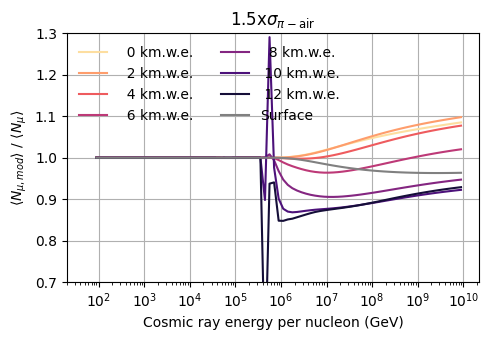

In [11]:
# add ratio plot

plt.figure(figsize=(5.0, 3.5))
angle = 0.0
for ia, X in enumerate(mh.slant_depths[:-1:4]):
    l = plt.plot(
        mh.cr_grid,
        np.array([mh.mean_mult(X, angle, yields_apr_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.mean_mult(X, angle, yields_apr, ei) for ei, e_cr in enumerate(mh.cr_grid)]),
        c=s_m.to_rgba(X),
        label=r"{0:3.0f} km.w.e.".format(X),
    )[0]
plt.plot(
    mh.cr_grid,
    np.array([mh.mean_mult(0., angle, yields_apr_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.mean_mult(0., angle, yields_apr, ei) for ei, e_cr in enumerate(mh.cr_grid)]),
    color="gray",
    label=r"Surface".format(X),
)[0]

plt.xscale('log')
if nucleus =='_fe':
    plt.xlim(20.0, )
else:
    plt.xlim(20.0, 1e7)
plt.ylim(0.7,1.3)
plt.grid()
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"$\langle N_{\mu , mod} \rangle$ / $\langle N_{\mu} \rangle$")
plt.legend(frameon=False, ncol=2)
plt.title(cs + 'x$\sigma_{\pi -\mathrm{air}}$')
plt.tight_layout()

plt.savefig(plot_dir + 'ratio_nbundle_season_angle0_csp' + cs  + nucleus+ '.png')


<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/2514133337.py:31: SyntaxWarning: invalid escape sequence '\s'
  plt.title(cs +'x$\sigma_{\pi -\mathrm{air}}$')
/tmp/ipykernel_3928906/2514133337.py:8: RuntimeWarning: invalid value encountered in divide
  (np.array([mh.mean_mult(X, angle, yields_jan_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.mean_mult(X, angle, yields_jul_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)]))/(np.array([mh.mean_mult(X, angle, yields_jan, ei) for ei, e_cr in enumerate(mh.cr_grid)])/


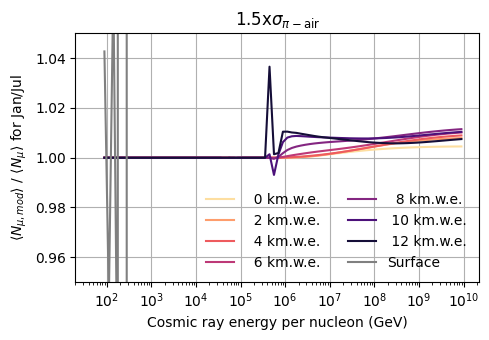

In [15]:
# seasonal dependence

plt.figure(figsize=(5.0, 3.5))
angle = 0.0
for ia, X in enumerate(mh.slant_depths[:-1:4]):
    l = plt.plot(
        mh.cr_grid,
        (np.array([mh.mean_mult(X, angle, yields_jan_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.mean_mult(X, angle, yields_jul_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)]))/(np.array([mh.mean_mult(X, angle, yields_jan, ei) for ei, e_cr in enumerate(mh.cr_grid)])/
                                                                                                                                                                                                         np.array([mh.mean_mult(X, angle, yields_jul, ei) for ei, e_cr in enumerate(mh.cr_grid)])),
        c=s_m.to_rgba(X),
        label=r"{0:3.0f} km.w.e.".format(X),
    )[0]
plt.plot(
    mh.cr_grid,
    (np.array([mh.mean_mult(0., angle, yields_jan_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.mean_mult(0., angle, yields_jul_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)]))/(np.array([mh.mean_mult(X, angle, yields_jan, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.mean_mult(X, angle, yields_jul, ei) for ei, e_cr in enumerate(mh.cr_grid)])),
    color="gray",
    label=r"Surface".format(X),
)[0]

plt.xscale('log')
if nucleus == '_fe':
    plt.xlim(20.0, )
else:
    plt.xlim(20.0, 1e7)
 
plt.ylim(0.95,1.05)
plt.grid()
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"$\langle N_{\mu , mod} \rangle$ / $\langle N_{\mu} \rangle$ for Jan/Jul")
plt.legend(frameon=False, ncol=2)
plt.title(cs +'x$\sigma_{\pi -\mathrm{air}}$')
plt.tight_layout()

plt.savefig(plot_dir + 'ratio_nbundle_season_angle0_csp' + cs  + nucleus+ 'seasonalratio.png')

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/465174631.py:14: SyntaxWarning: invalid escape sequence '\s'
  label='Vertical @ {X} kmwe, Jan ' + cs +'x$\sigma_{\pi -\mathrm{air}}$', ls='--'
/tmp/ipykernel_3928906/465174631.py:29: SyntaxWarning: invalid escape sequence '\s'
  label='Integrated @ {X} kmwe, Jan ' + cs +'x$\sigma_{\pi -\mathrm{air}}$',ls='--'


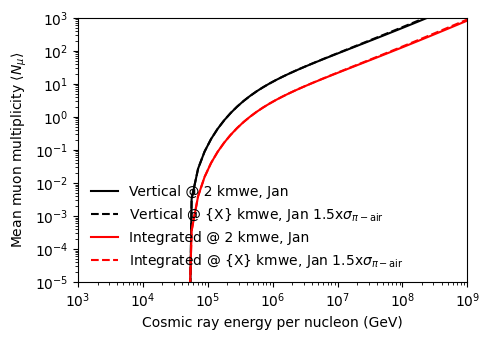

In [16]:
plt.figure(figsize=(5.0, 3.5)) # check angles in IC 
X = 2
plt.loglog(
    mh.cr_grid,
    [mh.mean_mult(X, 0.0, yields_jan, ei) for ei, e_cr in enumerate(mh.cr_grid)],
    c="k",
    label=f"Vertical @ {X} kmwe, Jan",
)[0]

plt.loglog(
    mh.cr_grid,
    [mh.mean_mult(X, 0.0, yields_jan_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)],
    c="k",
    label='Vertical @ {X} kmwe, Jan ' + cs +'x$\sigma_{\pi -\mathrm{air}}$', ls='--'
)[0]


plt.loglog(
    mh.cr_grid,
    [mh.integrated_mean_mult(X, yields_jan, ei) for ei, e_cr in enumerate(mh.cr_grid)],
    c="r",
    label=f"Integrated @ {X} kmwe, Jan",
)[0]

plt.loglog(
    mh.cr_grid,
    [mh.integrated_mean_mult(X, yields_jan_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)],
    c="r",
    label='Integrated @ {X} kmwe, Jan ' + cs +'x$\sigma_{\pi -\mathrm{air}}$',ls='--'
)[0]

# plt.loglog(cr_grid,[surf_mean_mult(ground_muspec_prim_energies[ei]) for ei, e_cr in enumerate(cr_grid)],
#            color='gray', label=r'Surface'.format(d0/d0cosa))[0]
plt.ylim(1e-5, 1e3)
plt.xlim(1e3, 1e9)
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"Mean muon multiplicity $\langle N_\mu \rangle$")
plt.legend(frameon=False, ncol=1)
plt.tight_layout()
# nbu.save('STRAW_muon_multiplicity')

plt.savefig(plot_dir + 'nbundle_jan_nucleonenergy_csp' + cs + nucleus+ '.png')


<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/880155976.py:14: SyntaxWarning: invalid escape sequence '\s'
  label='Vertical @ {X} kmwe, Jul ' +cs +'x$\sigma_{\pi -\mathrm{air}}$', ls='--'
/tmp/ipykernel_3928906/880155976.py:29: SyntaxWarning: invalid escape sequence '\s'
  label='Integrated @ {X} kmwe, Jul ' +cs +'x$\sigma_{\pi -\mathrm{air}}$',ls='--'


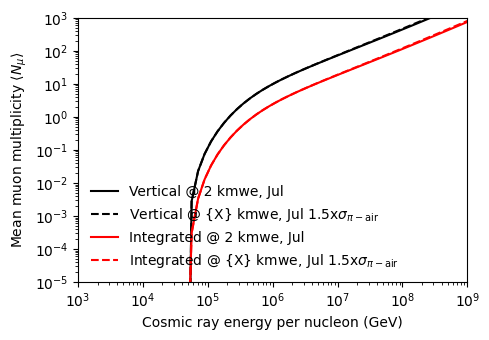

In [17]:
plt.figure(figsize=(5.0, 3.5)) # check angles in IC 
X = 2
plt.loglog(
    mh.cr_grid,
    [mh.mean_mult(X, 0.0, yields_jul, ei) for ei, e_cr in enumerate(mh.cr_grid)],
    c="k",
    label=f"Vertical @ {X} kmwe, Jul",
)[0]

plt.loglog(
    mh.cr_grid,
    [mh.mean_mult(X, 0.0, yields_jul_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)],
    c="k",
    label='Vertical @ {X} kmwe, Jul ' +cs +'x$\sigma_{\pi -\mathrm{air}}$', ls='--'
)[0]


plt.loglog(
    mh.cr_grid,
    [mh.integrated_mean_mult(X, yields_jul, ei) for ei, e_cr in enumerate(mh.cr_grid)],
    c="r",
    label=f"Integrated @ {X} kmwe, Jul",
)[0]

plt.loglog(
    mh.cr_grid,
    [mh.integrated_mean_mult(X, yields_jul_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)],
    c="r",
    label='Integrated @ {X} kmwe, Jul ' +cs +'x$\sigma_{\pi -\mathrm{air}}$',ls='--'
)[0]

# plt.loglog(cr_grid,[surf_mean_mult(ground_muspec_prim_energies[ei]) for ei, e_cr in enumerate(cr_grid)],
#            color='gray', label=r'Surface'.format(d0/d0cosa))[0]
plt.ylim(1e-5, 1e3)
plt.xlim(1e3, 1e9)
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"Mean muon multiplicity $\langle N_\mu \rangle$")
plt.legend(frameon=False, ncol=1)
plt.tight_layout()
# nbu.save('STRAW_muon_multiplicity')

plt.savefig(plot_dir + 'nbundle_jul_nucleonenergy_csp ' + cs  + nucleus+  '.png')


<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/1774519747.py:29: SyntaxWarning: invalid escape sequence '\s'
  plt.title( cs +'x$\sigma_{\pi -\mathrm{air}}$')


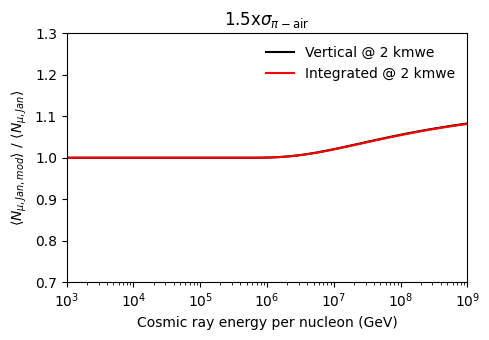

In [18]:
# add ratio


plt.figure(figsize=(5.0, 3.5)) # check angles in IC 
X = 2
plt.plot(
    mh.cr_grid,
    np.array([mh.mean_mult(X, 0.0, yields_jan_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.mean_mult(X, 0.0, yields_jan, ei) for ei, e_cr in enumerate(mh.cr_grid)]),
    c="k",
    label=f"Vertical @ {X} kmwe",
)[0]

plt.plot(
    mh.cr_grid,
    np.array([mh.integrated_mean_mult(X, yields_jan_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.integrated_mean_mult(X, yields_jan, ei) for ei, e_cr in enumerate(mh.cr_grid)]),
    c="r",
    label=f"Integrated @ {X} kmwe",
)[0]


# plt.loglog(cr_grid,[surf_mean_mult(ground_muspec_prim_energies[ei]) for ei, e_cr in enumerate(cr_grid)],
#            color='gray', label=r'Surface'.format(d0/d0cosa))[0]
plt.ylim(0.7,1.3)
plt.xlim(1e3, 1e9)
plt.xscale('log')
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"$\langle N_{\mu , Jan, mod} \rangle$ / $\langle N_{\mu , Jan} \rangle$")
plt.legend(frameon=False, ncol=1)
plt.title( cs +'x$\sigma_{\pi -\mathrm{air}}$')
plt.tight_layout()

plt.savefig(plot_dir + 'nbundle_jan_nucleonenergy_csp ' + cs  + nucleus+ '_ratio.png')

<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/3719137507.py:26: SyntaxWarning: invalid escape sequence '\s'
  plt.title(cs + 'x$\sigma_{\pi -\mathrm{air}}$')


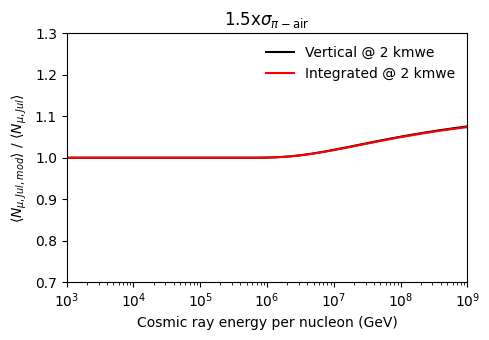

In [19]:
plt.figure(figsize=(5.0, 3.5)) # check angles in IC 
X = 2
plt.plot(
    mh.cr_grid,
    np.array([mh.mean_mult(X, 0.0, yields_jul_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.mean_mult(X, 0.0, yields_jul, ei) for ei, e_cr in enumerate(mh.cr_grid)]),
    c="k",
    label=f"Vertical @ {X} kmwe",
)[0]

plt.plot(
    mh.cr_grid,
    np.array([mh.integrated_mean_mult(X, yields_jul_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.integrated_mean_mult(X, yields_jul, ei) for ei, e_cr in enumerate(mh.cr_grid)]),
    c="r",
    label=f"Integrated @ {X} kmwe",
)[0]


# plt.loglog(cr_grid,[surf_mean_mult(ground_muspec_prim_energies[ei]) for ei, e_cr in enumerate(cr_grid)],
#            color='gray', label=r'Surface'.format(d0/d0cosa))[0]
plt.ylim(0.7,1.3)
plt.xlim(1e3, 1e9)
plt.xscale('log')
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"$\langle N_{\mu , Jul, mod} \rangle$ / $\langle N_{\mu , Jul} \rangle$")
plt.legend(frameon=False, ncol=1)
plt.title(cs + 'x$\sigma_{\pi -\mathrm{air}}$')
plt.tight_layout()

plt.savefig(plot_dir + 'nbundle_jul_nucleonenergy_csp' +cs  + nucleus+ '_ratio.png')

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/1606805330.py:21: SyntaxWarning: invalid escape sequence '\s'
  label='Vertical @ {X} kmwe ' +cs +'x$\sigma_{\pi -\mathrm{air}}$', ls='--'
/tmp/ipykernel_3928906/1606805330.py:28: SyntaxWarning: invalid escape sequence '\s'
  label='Integrated @ {X} kmwe ' +cs +'x$\sigma_{\pi -\mathrm{air}}$', ls='--'
/tmp/ipykernel_3928906/1606805330.py:40: SyntaxWarning: invalid escape sequence '\s'
  plt.title( cs + 'x$\sigma_{\pi -\mathrm{air}}$')


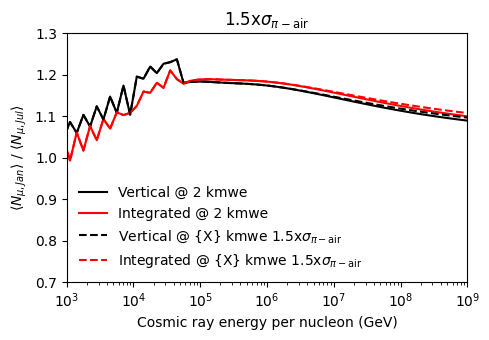

In [20]:
plt.figure(figsize=(5.0, 3.5)) # check angles in IC 
X = 2
plt.plot(
    mh.cr_grid,
    np.array([mh.mean_mult(X, 0.0, yields_jan, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.mean_mult(X, 0.0, yields_jul, ei) for ei, e_cr in enumerate(mh.cr_grid)]),
    c="k",
    label=f"Vertical @ {X} kmwe",
)[0]

plt.plot(
    mh.cr_grid,
    np.array([mh.integrated_mean_mult(X, yields_jan, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.integrated_mean_mult(X, yields_jul, ei) for ei, e_cr in enumerate(mh.cr_grid)]),
    c="r",
    label=f"Integrated @ {X} kmwe",
)[0]

plt.plot(
    mh.cr_grid,
    np.array([mh.mean_mult(X, 0.0, yields_jan_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.mean_mult(X, 0.0, yields_jul_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)]),
    c="k",
    label='Vertical @ {X} kmwe ' +cs +'x$\sigma_{\pi -\mathrm{air}}$', ls='--'
)[0]

plt.plot(
    mh.cr_grid,
    np.array([mh.integrated_mean_mult(X, yields_jan_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.integrated_mean_mult(X, yields_jul_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)]),
    c="r",
    label='Integrated @ {X} kmwe ' +cs +'x$\sigma_{\pi -\mathrm{air}}$', ls='--'
)[0]


# plt.loglog(cr_grid,[surf_mean_mult(ground_muspec_prim_energies[ei]) for ei, e_cr in enumerate(cr_grid)],
#            color='gray', label=r'Surface'.format(d0/d0cosa))[0]
plt.ylim(0.7,1.3)
plt.xlim(1e3, 1e9)
plt.xscale('log')
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"$\langle N_{\mu , Jan} \rangle$ / $\langle N_{\mu , Jul} \rangle$")
plt.legend(frameon=False, ncol=1)
plt.title( cs + 'x$\sigma_{\pi -\mathrm{air}}$')
plt.tight_layout()

plt.savefig(plot_dir + 'nbundle_nucleonenergy_csp' + cs + nucleus+ '_ratio_season.png')

<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/2812750440.py:19: SyntaxWarning: invalid escape sequence '\s'
  plt.title(cs +'x$\sigma_{\pi -\mathrm{air}}$')


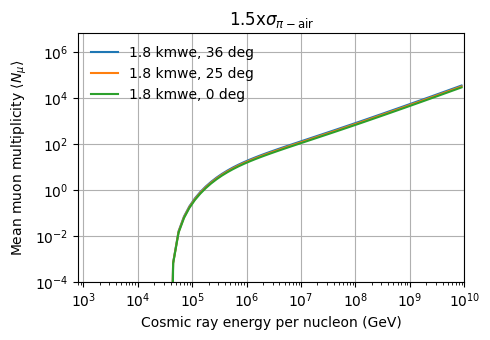

In [21]:
cos_thetas = np.arange(0.8, 1.001, 0.1)
angles = np.int32(np.degrees(np.arccos(cos_thetas)))

plt.figure(figsize=(5.0, 3.5))
X = 1.8  # kmwe
for angle in angles:
    plt.loglog(
        mh.cr_grid,
        [mh.mean_mult(X, angle, yields_jan_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)],
        label=f"{X} kmwe, {angle} deg",
    )[0]

plt.xlim(8e2, 1e10)
plt.ylim(1e-4, )
plt.grid()
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"Mean muon multiplicity $\langle N_\mu \rangle$")
plt.legend(frameon=False, ncol=1)
plt.title(cs +'x$\sigma_{\pi -\mathrm{air}}$')
plt.tight_layout()

plt.savefig(plot_dir + 'nbundle_nucleonenergy_perangle_jan_csp' +cs  + nucleus+ '.png')


<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/4138370860.py:16: SyntaxWarning: invalid escape sequence '\s'
  label=r'{X} kmwe, {angle} deg, ' +cs +'x$\sigma_{\pi -\mathrm{air}}$', ls='--'


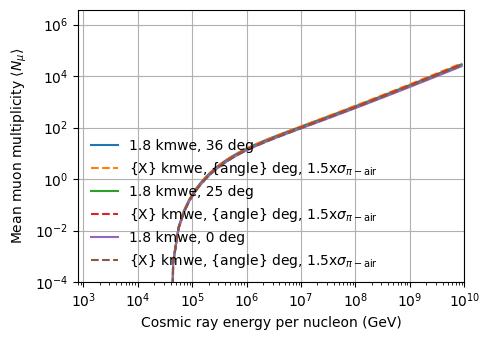

In [22]:
cos_thetas = np.arange(0.8, 1.001, 0.1)
angles = np.int32(np.degrees(np.arccos(cos_thetas)))

plt.figure(figsize=(5.0, 3.5))
X = 1.8  # kmwe
for angle in angles:
    plt.loglog(
        mh.cr_grid,
        [mh.mean_mult(X, angle, yields_jul, ei) for ei, e_cr in enumerate(mh.cr_grid)],
        label=f"{X} kmwe, {angle} deg",
    )[0]

    plt.loglog(
        mh.cr_grid,
        [mh.mean_mult(X, angle, yields_jul_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)],
        label=r'{X} kmwe, {angle} deg, ' +cs +'x$\sigma_{\pi -\mathrm{air}}$', ls='--'
    )[0]

plt.xlim(8e2, 1e10)
plt.ylim(1e-4, )
plt.grid()
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"Mean muon multiplicity $\langle N_\mu \rangle$")
plt.legend(frameon=False, ncol=1)
plt.tight_layout()

plt.savefig(plot_dir + 'nbundle_nucleonenergy_perangle_jul_csp' + cs  + nucleus+ '.png')

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/468056946.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.title(cs + 'x$\sigma_{\pi -\mathrm{air}}$')


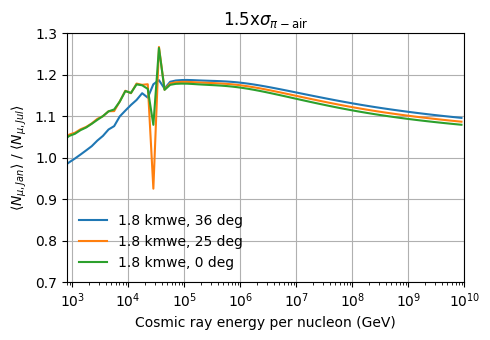

In [23]:
# ratio jan to jul

cos_thetas = np.arange(0.8, 1.001, 0.1)
angles = np.int32(np.degrees(np.arccos(cos_thetas)))

plt.figure(figsize=(5.0, 3.5))
X = 1.8  # kmwe
for angle in angles:
    plt.plot(
        mh.cr_grid,
        np.array([mh.mean_mult(X, angle, yields_jan_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.mean_mult(X, angle, yields_jul_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)]),
        label=f"{X} kmwe, {angle} deg",
    )[0]

plt.xlim(8e2, 1e10)
plt.ylim(0.7, 1.3)
plt.grid()
plt.xscale('log')
plt.ylabel(r"$\langle N_{\mu , Jan} \rangle$ / $\langle N_{\mu , Jul} \rangle$")
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.title(cs + 'x$\sigma_{\pi -\mathrm{air}}$')
plt.legend(frameon=False, ncol=1)
plt.tight_layout()

plt.savefig(plot_dir + 'nbundle_nucleonenergy_perangle_ratio_season_csp' + cs  + nucleus+ '.png')

<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/2509460646.py:20: SyntaxWarning: invalid escape sequence '\s'
  plt.title(cs+'x$\sigma_{\pi -\mathrm{air}}$')


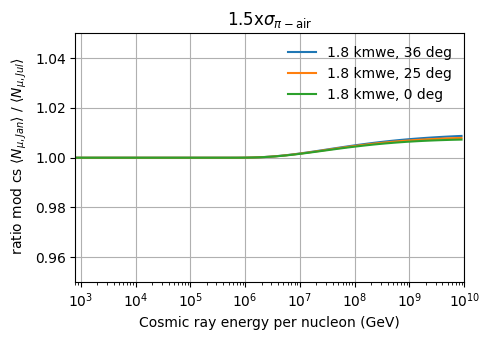

In [24]:
cos_thetas = np.arange(0.8, 1.001, 0.1)
angles = np.int32(np.degrees(np.arccos(cos_thetas)))

plt.figure(figsize=(5.0, 3.5))
X = 1.8  # kmwe
for angle in angles:
    plt.plot(
        mh.cr_grid,
        (np.array([mh.mean_mult(X, angle, yields_jan_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.mean_mult(X, angle, yields_jul_mod, ei) for ei, e_cr in enumerate(mh.cr_grid)]))/
        (np.array([mh.mean_mult(X, angle, yields_jan, ei) for ei, e_cr in enumerate(mh.cr_grid)])/np.array([mh.mean_mult(X, angle, yields_jul, ei) for ei, e_cr in enumerate(mh.cr_grid)])),
        label=f"{X} kmwe, {angle} deg",
    )[0]

plt.xlim(8e2, 1e10)
plt.ylim(0.95, 1.05)
plt.grid()
plt.xscale('log')
plt.ylabel(r" ratio mod cs $\langle N_{\mu , Jan} \rangle$ / $\langle N_{\mu , Jul} \rangle$")
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.title(cs+'x$\sigma_{\pi -\mathrm{air}}$')
plt.legend(frameon=False, ncol=1)
plt.tight_layout()

plt.savefig(plot_dir + 'nbundle_nucleonenergy_perangle_ratio_seasonal_csp' + cs  + nucleus+ '.png')

<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/136860526.py:27: SyntaxWarning: invalid escape sequence '\s'
  label=r'Surface, ' +cs +'x$\sigma_{\pi -\mathrm{air}}$',ls='--'
/tmp/ipykernel_3928906/136860526.py:33: SyntaxWarning: invalid escape sequence '\s'
  plt.title(cs +'x$\sigma_{\pi -\mathrm{air}}$')


AssertionError: Flux is zero everywhere

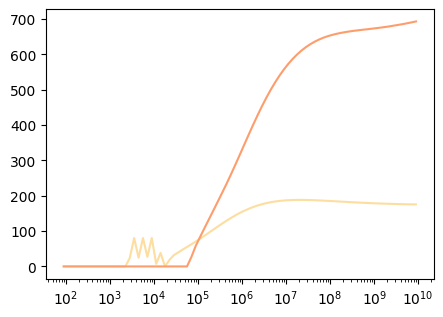

In [26]:
plt.figure(figsize=(5.0, 3.5))
for ia, X in enumerate(mh.slant_depths[:-1:4]):
    plt.semilogx(
        mh.cr_grid,
        [mh.mean_e(X, 0.0, ei, yields_jan, flcutoff=1e-10) for ei, e_cr in enumerate(mh.cr_grid)],
        c=s_m.to_rgba(X),
        label=r"{0:3.0f} km.w.e.".format(X),
    )[0]
plt.semilogx(
    mh.cr_grid,
    [mh.mean_e(0.0, 0.0, ei, yields_jan, flcutoff=1e-10) for ei, e_cr in enumerate(mh.cr_grid)],
    color="gray",
    label=r"Surface",
)[0]

for ia, X in enumerate(mh.slant_depths[:-1:4]):
    plt.semilogx(
        mh.cr_grid,
        [mh.mean_e(X, 0.0, ei, yields_jan_mod, flcutoff=1e-10) for ei, e_cr in enumerate(mh.cr_grid)],
        c=s_m.to_rgba(X),
        ls='--'
    )[0]
plt.semilogx(
    mh.cr_grid,
    [mh.mean_e(0.0, 0.0, ei, yields_jan_mod, flcutoff=1e-10) for ei, e_cr in enumerate(mh.cr_grid)],
    color="gray",
    label=r'Surface, ' +cs +'x$\sigma_{\pi -\mathrm{air}}$',ls='--'
)[0]
# plt.ylim(1e-2,1e7)
# plt.xlim(200.,1e7)
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"Mean muon energy $\langle E \rangle$ (GeV)")
plt.title(cs +'x$\sigma_{\pi -\mathrm{air}}$')
plt.legend(frameon=False, ncol=2)
plt.tight_layout()

plt.savefig(plot_dir + 'meanmuonE_nucleonenergy_jan_csp' + cs + nucleus+  '.png')


<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/2002371353.py:27: SyntaxWarning: invalid escape sequence '\s'
  label=r'Surface, ' + cs + 'x$\sigma_{\pi -\mathrm{air}}$',ls='--'
/tmp/ipykernel_3928906/2002371353.py:33: SyntaxWarning: invalid escape sequence '\s'
  plt.title('0.5x$\sigma_{\pi -\mathrm{air}}$')
/tmp/ipykernel_3928906/2002371353.py:27: SyntaxWarning: invalid escape sequence '\s'
  label=r'Surface, ' + cs + 'x$\sigma_{\pi -\mathrm{air}}$',ls='--'
/tmp/ipykernel_3928906/2002371353.py:33: SyntaxWarning: invalid escape sequence '\s'
  plt.title('0.5x$\sigma_{\pi -\mathrm{air}}$')


AssertionError: Flux is zero everywhere

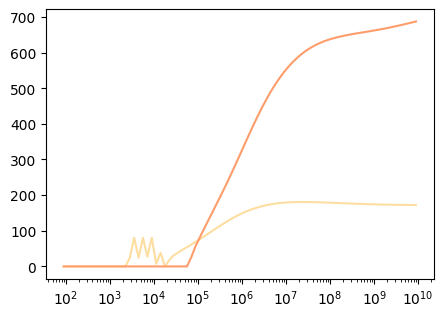

In [27]:
plt.figure(figsize=(5.0, 3.5))
for ia, X in enumerate(mh.slant_depths[:-1:4]):
    plt.semilogx(
        mh.cr_grid,
        [mh.mean_e(X, 0.0, ei, yields_jul, flcutoff=1e-10) for ei, e_cr in enumerate(mh.cr_grid)],
        c=s_m.to_rgba(X),
        label=r"{0:3.0f} km.w.e.".format(X),
    )[0]
plt.semilogx(
    mh.cr_grid,
    [mh.mean_e(0.0, 0.0, ei, yields_jul, flcutoff=1e-10) for ei, e_cr in enumerate(mh.cr_grid)],
    color="gray",
    label=r"Surface",
)[0]

for ia, X in enumerate(mh.slant_depths[:-1:4]):
    plt.semilogx(
        mh.cr_grid,
        [mh.mean_e(X, 0.0, ei, yields_jul_mod, flcutoff=1e-10) for ei, e_cr in enumerate(mh.cr_grid)],
        c=s_m.to_rgba(X),
        ls='--'
    )[0]
plt.semilogx(
    mh.cr_grid,
    [mh.mean_e(0.0, 0.0, ei, yields_jul_mod, flcutoff=1e-10) for ei, e_cr in enumerate(mh.cr_grid)],
    color="gray",
    label=r'Surface, ' + cs + 'x$\sigma_{\pi -\mathrm{air}}$',ls='--'
)[0]
# plt.ylim(1e-2,1e7)
# plt.xlim(200.,1e7)
plt.xlabel("Cosmic ray energy per nucleon (GeV)")
plt.ylabel(r"Mean muon energy $\langle E \rangle$ (GeV)")
plt.title('0.5x$\sigma_{\pi -\mathrm{air}}$')
plt.legend(frameon=False, ncol=2)
plt.tight_layout()

plt.savefig(plot_dir + 'meanmuonE_nucleonenergy_jul_csp ' + cs  + nucleus+  '.png')

<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/2186600327.py:34: SyntaxWarning: invalid escape sequence '\s'
  plt.title(cs + 'x$\sigma_{\pi -\mathrm{air}}$')


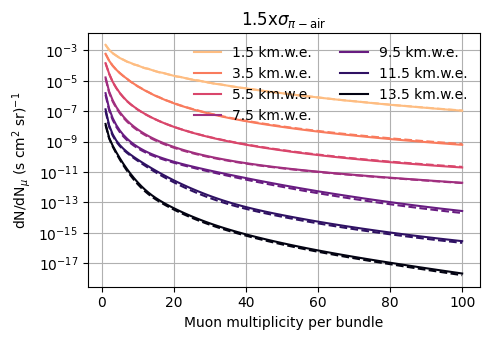

In [30]:
plt.figure(figsize=(5.0, 3.5))
lines=[]
angle = 0.0
for X in mh.slant_depths[2:-1:4]:
    plt.semilogy(
        mh.n_mu_vec,
        1e4
        * mh.mult_dist(
            X,
            0.0,
            pm.GlobalSplineFitBeta(),yields_jan,
            norm=False,
        )
        / mh.rates(X, angle, jan),
        c=s_m.to_rgba(X),
        label=r"{0:3.1f} km.w.e.".format(X),
    )[0]

    plt.semilogy(
        mh.n_mu_vec,
        1e4
        * mh.mult_dist(
            X,
            0.0,
            pm.GlobalSplineFitBeta(),yields_jan_mod,
            norm=False,
        )
        / mh.rates(X, angle, jan_mod),
        c=s_m.to_rgba(X),
        ls='--',
    )[0]
    
plt.xlabel("Muon multiplicity per bundle")
plt.title(cs + 'x$\sigma_{\pi -\mathrm{air}}$')
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$")
lines.append(mlines.Line2D([], [], color='k', linestyle="--", label="jan"))
plt.legend(handles=lines, frameon=False, loc="lower left")
plt.legend(frameon=False, ncol=2)
# plt.ylim(1e-11, 8e-5)
# plt.xlim(4,100)

plt.grid()
plt.tight_layout()

plt.savefig(plot_dir + 'multiperbundle_jan_csp' + cs + nucleus+  '.png')

In [23]:
jan_mod

'jan_p15'

<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/2379166110.py:34: SyntaxWarning: invalid escape sequence '\s'
  plt.title(cs + 'x$\sigma_{\pi -\mathrm{air}}$')


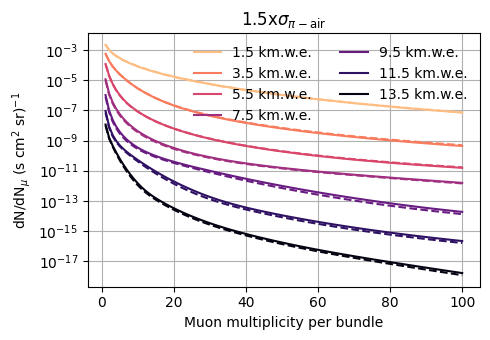

In [31]:
plt.figure(figsize=(5.0, 3.5))
lines=[]
angle = 0.0
for X in mh.slant_depths[2:-1:4]:
    plt.semilogy(
        mh.n_mu_vec,
        1e4
        * mh.mult_dist(
            X,
            0.0,
            pm.GlobalSplineFitBeta(),yields_jul,
            norm=False,
        )
        / mh.rates(X, angle, "jul"),
        c=s_m.to_rgba(X),
        label=r"{0:3.1f} km.w.e.".format(X),
    )[0]

    plt.semilogy(
        mh.n_mu_vec,
        1e4
        * mh.mult_dist(
            X,
            0.0,
            pm.GlobalSplineFitBeta(),yields_jul_mod,
            norm=False,
        )
        / mh.rates(X, angle, jul_mod),
        c=s_m.to_rgba(X),
        ls='--',
    )[0]
    
plt.xlabel("Muon multiplicity per bundle")
plt.title(cs + 'x$\sigma_{\pi -\mathrm{air}}$')
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$")
lines.append(mlines.Line2D([], [], color='k', linestyle="--", label="jul"))
plt.legend(handles=lines, frameon=False, loc="lower left")
plt.legend(frameon=False, ncol=2)
# plt.ylim(1e-11, 8e-5)
# plt.xlim(4,100)

plt.grid()
plt.tight_layout()

plt.savefig(plot_dir + 'multiperbundle_jul_csp' + cs + nucleus+  '.png')

<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/1107151893.py:26: SyntaxWarning: invalid escape sequence '\s'
  plt.title(cs +'x$\sigma_{\pi -\mathrm{air}}$')


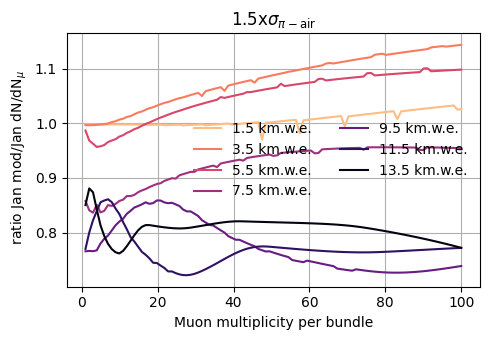

In [32]:
plt.figure(figsize=(5.0, 3.5))
angle = 0.0
for X in mh.slant_depths[2:-1:4]:
    plt.plot(
        mh.n_mu_vec,(
        1e4
        * mh.mult_dist(
            X,
            0.0,
            pm.GlobalSplineFitBeta(),yields_jan_mod,
            norm=False,
        )
        / mh.rates(X, angle, jan_mod)) / (1e4
        * mh.mult_dist(
            X,
            0.0,
            pm.GlobalSplineFitBeta(),yields_jan,
            norm=False,
        )
        / mh.rates(X, angle, jan)) ,
        c=s_m.to_rgba(X),
        label=r"{0:3.1f} km.w.e.".format(X),
    )[0]

plt.xlabel("Muon multiplicity per bundle")
plt.title(cs +'x$\sigma_{\pi -\mathrm{air}}$')
plt.ylabel(r" ratio Jan mod/Jan dN/dN$_\mu$")
plt.legend(frameon=False, ncol=2)

# plt.xlim(4,100)
plt.grid()
plt.tight_layout()

plt.savefig(plot_dir + 'ratio_multiperbundle_jan_csp ' +cs  + nucleus+ '.png')

<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3928906/2737780563.py:26: SyntaxWarning: invalid escape sequence '\s'
  plt.title(cs +'x$\sigma_{\pi -\mathrm{air}}$')


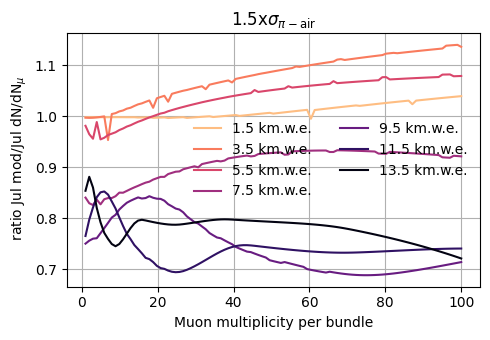

In [33]:
plt.figure(figsize=(5.0, 3.5))
angle = 0.0
for X in mh.slant_depths[2:-1:4]:
    plt.plot(
        mh.n_mu_vec,(
        1e4
        * mh.mult_dist(
            X,
            0.0,
            pm.GlobalSplineFitBeta(),yields_jul_mod,
            norm=False,
        )
        / mh.rates(X, angle, jul_mod)) / (1e4
        * mh.mult_dist(
            X,
            0.0,
            pm.GlobalSplineFitBeta(),yields_jul,
            norm=False,
        )
        / mh.rates(X, angle, jul)) ,
        c=s_m.to_rgba(X),
        label=r"{0:3.1f} km.w.e.".format(X),
    )[0]

plt.xlabel("Muon multiplicity per bundle")
plt.title(cs +'x$\sigma_{\pi -\mathrm{air}}$')
plt.ylabel(r" ratio Jul mod/Jul dN/dN$_\mu$")
plt.legend(frameon=False, ncol=2)

# plt.xlim(4,100)
plt.grid()
plt.tight_layout()

plt.savefig(plot_dir + 'ratio_multiperbundle_jul_csp' +cs + nucleus+ '.png')

error: (m>k) failed for hidden m: fpcurf0:m=0

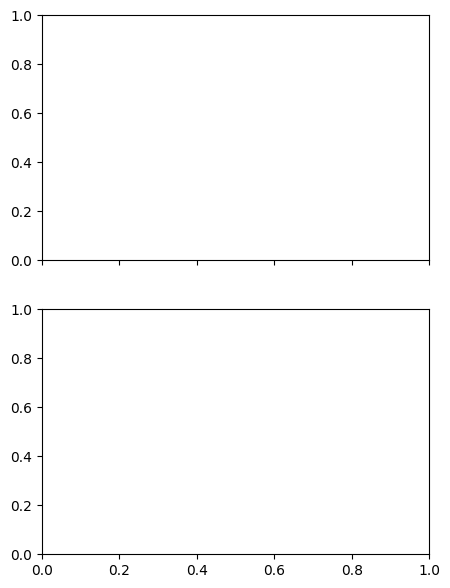

In [34]:
angle_list = angles
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5, 7), sharex=True)
X = 3.

lines = []  # create a list to store the Line2D objects
for angle in angle_list:
    color = ax1.semilogy(
        mh.n_mu_vec,
        1e4
        * mh.mult_dist(
            X,
            angle,
            pm.GlobalSplineFitBeta(),jan,
            norm=False,
        )
        / mh.rates(X, angle, jan),
        label=f"{angle} degrees",
    )[0].get_color()
    ax1.semilogy(
        mh.n_mu_vec,
        1e4
        * mh.mult_dist(
            X,
            angle,
            pm.GlobalSplineFitBeta(),jul,
            norm=False,
        )
        / mh.rates(X, angle, jul),
        linestyle="--",
        color=color,  # pass the same color to both calls
    )
    ax2.semilogx(
        mh.n_mu_vec,
        (
            mh.mult_dist(
                X,
                angle,
                pm.GlobalSplineFitBeta(),jan,
                norm=False,
            )
            / mh.mult_dist(X, angle, pm.GlobalSplineFitBeta(), jul,norm=False)
            / mh.rates(X, angle, jan)
            * mh.rates(X, angle, jul)
        ),
        label=f"{angle} degrees",
        color=color,
    )
# add the Line2D objects to the list
lines.append(mlines.Line2D([], [], color='k', linestyle="-", label="GST"))
lines.append(mlines.Line2D([], [], color='k', linestyle="--", label="GSF"))

# ax1.set_xlabel("Muon multiplicity per bundle")
ax1.set_ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$")
ax1.legend(frameon=False, ncol=2)
# ax1.grid()

ax2.set_xlabel("Muon multiplicity per bundle")
ax2.set_ylabel(r"Ratio of dN/dN$_\mu$")
ax2.legend(frameon=False, ncol=2)
# ax2.grid()

# add the custom legend to the plot
ax1.legend(handles=lines, frameon=False, loc="upper right")
plt.tight_layout()

In [ ]:
for ia, d0cosa in enumerate(cosa):
    if ia in [1, 3, 4, 6, 9]:
        continue
    #     print(d0cosa,ia)
    d = d0 / d0cosa
    plt.loglog(
        n_mu_vec,
        get_mult_dist(ia, pm.GaisserStanevTilav("4-gen"), norm=False)
        / get_mult_dist(ia, pm.GlobalSplineFitBeta(), norm=False),
        c=s_m.to_rgba(d),
        label=r"${0:3.1f}^\circ$".format(angles[ia]),
    )[0]
#     plt.loglog(n_mu_vec,
#         get_mult_dist(ia,pm.GlobalSplineFitBeta(), norm=False),
#                c=s_m.to_rgba(d),ls='--')
plt.xlabel("Muon multiplicity per bundle/and angular bin")
plt.ylabel(r"Ratio of bundle mult. GST-4/GSF at $h=3$ km.w.e.")
plt.legend(frameon=False, ncol=2)
# plt.grid()
plt.tight_layout()
save("bundle_multiplicity_ratio_angles")

NameError: name 'cosa' is not defined

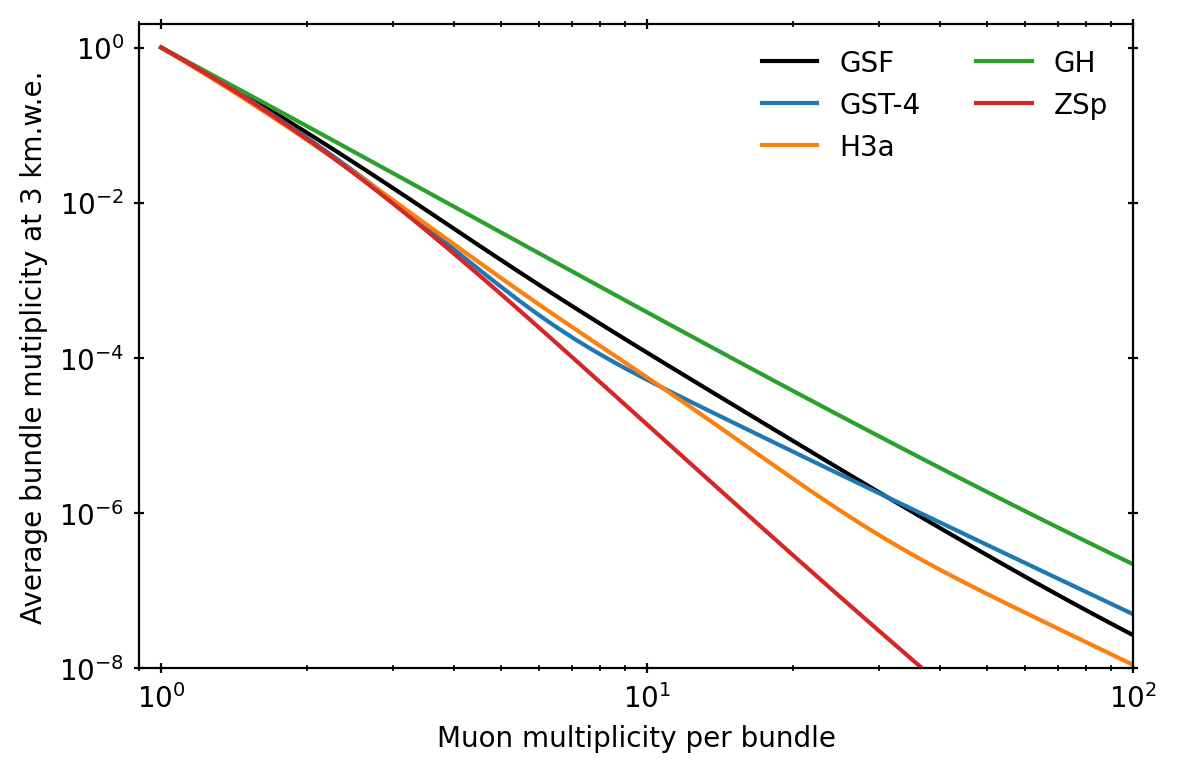

In [ ]:
plt.loglog(
    n_mu_vec, get_integrated_mult_dist(pm.GlobalSplineFitBeta()), label="GSF", color="k"
)
plt.loglog(
    n_mu_vec, get_integrated_mult_dist(pm.GaisserStanevTilav("4-gen")), label="GST-4"
)
plt.loglog(n_mu_vec, get_integrated_mult_dist(pm.HillasGaisser2012("H3a")), label="H3a")
plt.loglog(n_mu_vec, get_integrated_mult_dist(pm.GaisserHonda()), label="GH")
plt.loglog(
    n_mu_vec, get_integrated_mult_dist(pm.ZatsepinSokolskaya("pamela")), label="ZSp"
)
plt.gca().tick_params(
    axis="both", which="both", right=True, top=True, direction="inout"
)
plt.xlabel("Muon multiplicity per bundle")
plt.ylabel(r"Average bundle mutiplicity at 3 km.w.e.")
plt.legend(frameon=False, ncol=2)
plt.ylim(1e-8, 2e0)
plt.xlim(9e-1, 1e2)
plt.tight_layout()
save("Norm_bundle_multiplicity_3kmwe_sib23d.")

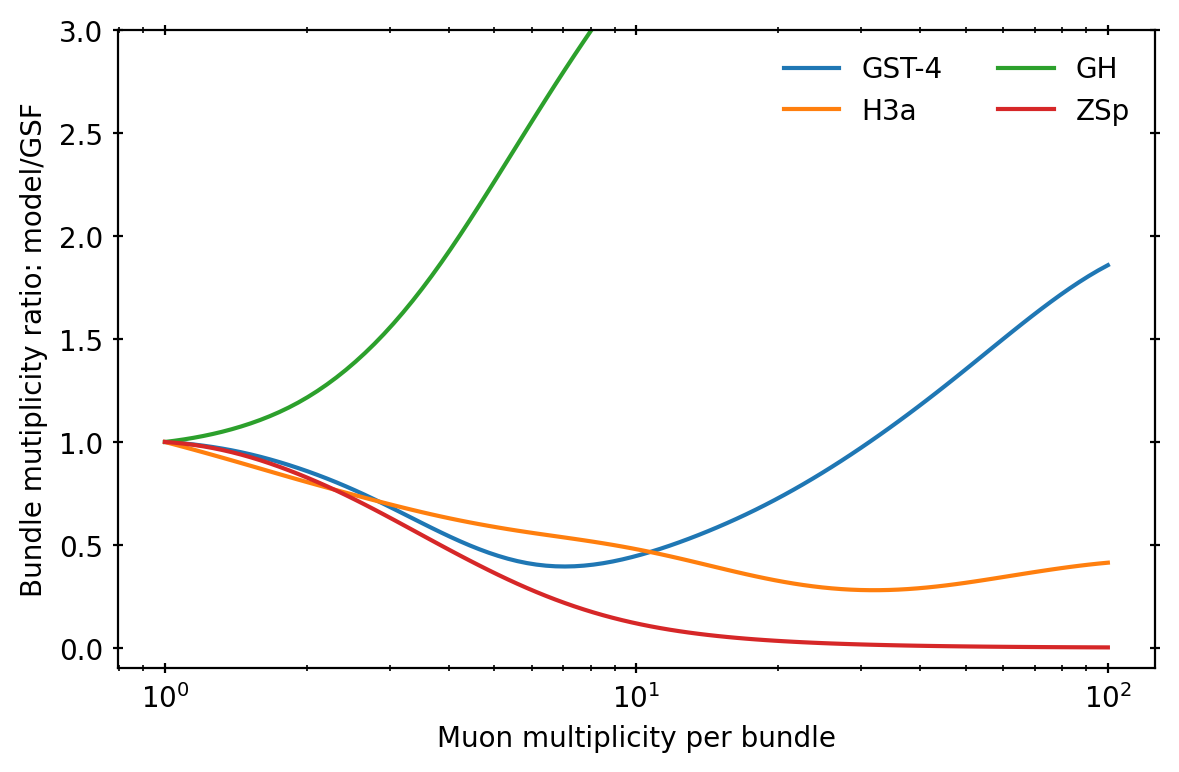

In [ ]:
plt.semilogx(
    n_mu_vec,
    get_integrated_mult_dist(pm.GaisserStanevTilav("4-gen"), norm=False)
    / get_integrated_mult_dist(pm.GlobalSplineFitBeta(), norm=False),
    label=r"GST-4".format(d0 / d0cosa),
)
plt.semilogx(
    n_mu_vec,
    get_integrated_mult_dist(pm.HillasGaisser2012("H3a"), norm=False)
    / get_integrated_mult_dist(pm.GlobalSplineFitBeta(), norm=False),
    label=r"H3a",
)
plt.semilogx(
    n_mu_vec,
    get_integrated_mult_dist(pm.GaisserHonda(None), norm=False)
    / get_integrated_mult_dist(pm.GlobalSplineFitBeta(), norm=False),
    label="GH",
)
plt.semilogx(
    n_mu_vec,
    get_integrated_mult_dist(pm.ZatsepinSokolskaya(), norm=False)
    / get_integrated_mult_dist(pm.GlobalSplineFitBeta(), norm=False),
    label="ZSp",
)
plt.xlabel("Muon multiplicity per bundle")
plt.ylabel(r"Bundle mutiplicity ratio: model/GSF")
plt.legend(frameon=False, ncol=2)
plt.ylim(-0.1, 3)
plt.gca().tick_params(
    axis="both", which="both", right=True, top=True, direction="inout"
)
plt.tight_layout()
save("ratio_GSF_bundle_multiplicity_3kmwe_sib23d")